**DAB304-Healthcare Analytics - Dental Caries Detection using Neural Network**

Section 002
Group 5


Name | Student ID
--- | ---
Mazhar Thobhani |  0769005
Sayyam Deepak Shambhuwani | 0770565
Manpreet Kaur | 0771048
Ramanpreet Kaur | 0775310

**Importing the dataset and the required libraries**

In [1]:
# mount the google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report

**Data Preprocessing**

In [3]:
# Image Data Augmentation to create transformed versions of train images 
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)
# Importing the images from drive
train_data = train_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/Colab Notebooks/Dataset/train/", 
    target_size= (748, 512), 
    batch_size= 16, 
)

Found 191 images belonging to 2 classes.


In [4]:
# Importing the test images from drive
test_data = train_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/Colab Notebooks/Dataset/test/", 
    target_size= (748, 512), 
    batch_size= 16, 
)

Found 35 images belonging to 2 classes.


In [5]:
# checking the categories

test_data.class_indices

{'caries': 0, 'healthy': 1}

In [6]:
# splitting the labels and images from the training dataset
total_img = len(train_data) 

X_train=np.concatenate([train_data.next()[0] for i in range(total_img)]) # images
y_train=np.concatenate([train_data.next()[1] for i in range(total_img)]) # labels

In [7]:

# splitting the labels and images from the training dataset
total_img = len(test_data) 

X_test=np.concatenate([test_data.next()[0] for i in range(total_img)]) # images
y_test=np.concatenate([test_data.next()[1] for i in range(total_img)]) # labels

In [8]:
# checking the dimesions of the train data
X_train.shape

(191, 748, 512, 3)

In [9]:
# checking the dimension of test data
y_train.shape

(191, 2)

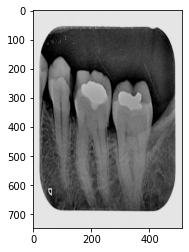

In [10]:
# Sample Image data 
import matplotlib.pyplot as plt

 
plt.imshow(X_train[48], cmap='gray')

**Building the model**

In [11]:
# Baseline Initial Model
model = Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (748,512,3)))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(units = 2, activation = "softmax"))

In [12]:
# Using EarlyStopping technique to automatically stop when loss of the model remains constant
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [13]:
# Summary of the model created
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 746, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 373, 255, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 373, 255, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 371, 253, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 185, 126, 128)    0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 185, 126, 128)     0

In [14]:
# Compiling the model by defining Loss, Optimizer and Metrics
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [15]:
# Fitting the model (training and validation phase in multiple epochs)
hist = model.fit(train_data, epochs=50, batch_size= 30, validation_data=test_data, callbacks=[callback])

Epoch 1/50
12/12 [==============================] - 44s 2s/step - loss: 1.8671 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.4286
Epoch 2/50
12/12 [==============================] - 22s 2s/step - loss: 0.6931 - accuracy: 0.4712 - val_loss: 0.6925 - val_accuracy: 0.5143
Epoch 3/50
12/12 [==============================] - 23s 2s/step - loss: 0.6920 - accuracy: 0.5445 - val_loss: 0.6890 - val_accuracy: 0.6571
Epoch 4/50
12/12 [==============================] - 23s 2s/step - loss: 0.6739 - accuracy: 0.6021 - val_loss: 0.6576 - val_accuracy: 0.5714
Epoch 5/50
12/12 [==============================] - 26s 2s/step - loss: 0.6575 - accuracy: 0.5707 - val_loss: 0.6766 - val_accuracy: 0.6857
Epoch 6/50
12/12 [==============================] - 22s 2s/step - loss: 0.7153 - accuracy: 0.6387 - val_loss: 0.6300 - val_accuracy: 0.6857
Epoch 7/50
12/12 [==============================] - 22s 2s/step - loss: 0.6179 - accuracy: 0.6702 - val_loss: 0.6209 - val_accuracy: 0.7429
Epoch 8/50
12/12 [==

In [16]:
# Importing Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
# Testing the model
y_pred = np.argmax(model.predict(X_test), axis=1) # predict method allows to predict values from test dataset. 
y_true = np.argmax(y_test, axis=1)


# Checking the accuracy score of the model by comparing the predicted value with the actual values. 
test_acc = accuracy_score(y_pred, y_true)
print('test_acc:', test_acc)

# Creating the confusion matrix to describe the performance of model
cm = confusion_matrix(y_true, y_pred)

test_acc: 0.4857142857142857


In [18]:
cm

array([[ 8, 12],
       [ 6,  9]])

Text(0.5, 1.0, 'Confussion Matrix')

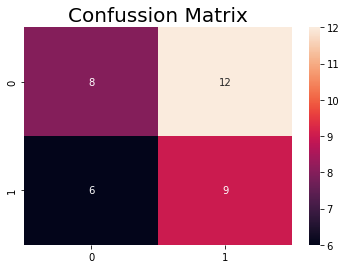

In [19]:
#Visualizing the results of Confusion matrix
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title("Confusion Matrix", fontsize = 20)

In [20]:
# Creating target Names for Classification Report
target_names = ['caries', 'healthy']

In [21]:
# Print Classification Report of baseline model
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      caries       0.57      0.40      0.47        20
     healthy       0.43      0.60      0.50        15

    accuracy                           0.49        35
   macro avg       0.50      0.50      0.49        35
weighted avg       0.51      0.49      0.48        35



In [22]:
# Creating a plot to show the accuracy summary of the predicted values.
def acc_plot(hist): 
  plt.plot(range(1, len(hist.history['accuracy']) + 1), hist.history['accuracy'])
  plt.plot(range(1, len(hist.history['val_accuracy']) + 1), hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.xticks(np.arange(2,21, 2.0))
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()


# creating a plot to show loss values
def loss_plot(hist):
  plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
  plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.xticks(np.arange(2,21, 2.0))
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

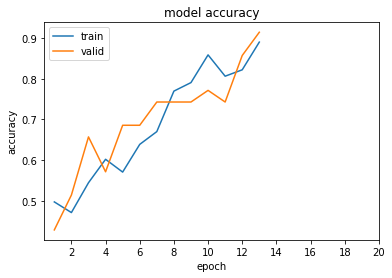

In [23]:
# Plotting graph for Accuracy vs Epoch
acc_plot(hist)

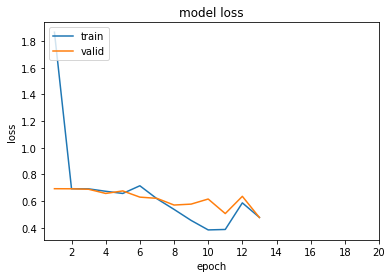

In [24]:
# Plotting graph for Loss vs Epoch
loss_plot(hist)

In [25]:
# Installing keras-tuner
# !pip install keras-tuner

     |████████████████████████████████| 98 kB 3.8 MB/s 


In [26]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [27]:
# Defining a function of the Model
def model_builder(hp):
  '''
  Args:
    hp - Keras tuner object
  '''
  model = Sequential()
  model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (748,512,3)))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.25))
  model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.25))
  model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.25))
  model.add(layers.Flatten())
  model.add(layers.Dense(units = 2, activation = "softmax"))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss="binary_crossentropy",
                metrics=['accuracy']) # Compiling the Model
  return model

In [28]:
# Instantiate the tuner
tuner = kt.Hyperband(model_builder, 
                     objective='val_accuracy', 
max_epochs=10,
factor=3, 
directory='dir' 
)

In [29]:
# Summary
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [30]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Perform hypertuning on baseline model
tuner.search(train_data, epochs=10, validation_data=test_data, callbacks=[stop_early])

Trial 3 Complete [00h 00m 51s]
val_accuracy: 0.5714285969734192

Best val_accuracy So Far: 0.8285714387893677
Total elapsed time: 00h 02m 50s
INFO:tensorflow:Oracle triggered exit


In [31]:
# Get Optimal hyperparameter
best_hp=tuner.get_best_hyperparameters()[0]

In [32]:
# Build the model with the optimal hyperparameters
h_model = tuner.hypermodel.build(best_hp)
h_model.summary() # Summary of the Model
hist1 = h_model.fit(train_data, epochs=10, validation_data=test_data) # Fitting the Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 746, 510, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 373, 255, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 373, 255, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 371, 253, 128)     36992     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 185, 126, 128)    0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 185, 126, 128)    

In [33]:
h_eval_dict = h_model.evaluate(X_test, y_test, return_dict=True)

2/2 [==============================] - 1s 72ms/step - loss: 1.1927 - accuracy: 0.4000


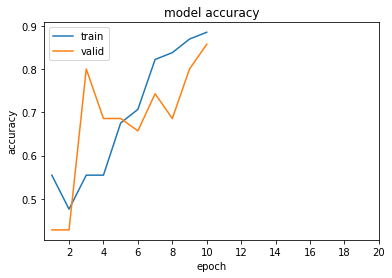

In [34]:
# Visualizing the accuracy of hypertuned model
acc_plot(hist1)

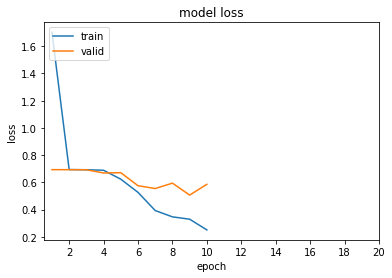

In [35]:
# Visualizing the loss of hypertuned model
loss_plot(hist1)

In [41]:
# Testing the model
y_pred = np.argmax(h_model.predict(X_test), axis=1) # predict method allows to predict values from test dataset. 
y_true = np.argmax(y_test, axis=1)


# Checking the accuracy score of the model by comparing the predicted value with the actual values. 
test_acc = accuracy_score(y_pred, y_true)
print('test_acc:', test_acc)

# Creating a confusion matrix to describe the performance of model
cm2 = confusion_matrix(y_true, y_pred)

test_acc: 0.4


In [42]:
cm2

array([[12,  8],
       [13,  2]])

Text(0.5, 1.0, 'Confusion Matrix')

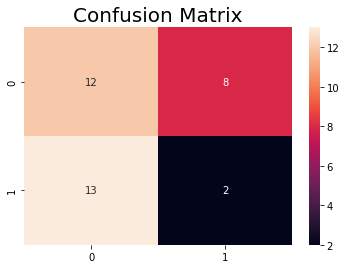

In [43]:
#Visualizing the results of Confusion matrix
sns.heatmap(cm2, annot = True, fmt = 'g')
plt.title("Confusion Matrix", fontsize = 20)

In [38]:
# Printing the Classification Report of hypertuned model 
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      caries       0.48      0.60      0.53        20
     healthy       0.20      0.13      0.16        15

    accuracy                           0.40        35
   macro avg       0.34      0.37      0.35        35
weighted avg       0.36      0.40      0.37        35



In [39]:
# Saving the Baseline Model 
model.save("model.h5")

In [40]:
# Saving the Final Model 
h_model.save("h_model.h5")